<a href="https://colab.research.google.com/github/jerome-05/jerome-05/blob/main/Marketing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CUSTOMER BEHAVIOUR ANALYSIS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Online_Sales.csv')
data

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,12/31/2019,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked
52920,14410,48494,12/31/2019,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used
52921,14410,48495,12/31/2019,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used
52922,14600,48496,12/31/2019,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked


In [ ]:
data.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status'],
      dtype='object')

In [ ]:
data.shape

(52924, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


In [ ]:
data.isnull().sum()

CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
dtype: int64

In [ ]:
data.duplicated(subset=['CustomerID','Transaction_ID','Transaction_Date','Product_Category','Quantity']).sum()

13029

In [ ]:
data.drop_duplicates(subset=['CustomerID','Transaction_ID','Transaction_Date','Product_Category','Quantity'],keep = 'first',inplace= True)

In [ ]:
data.shape

(39895, 10)

In [ ]:
data['Coupon_Status'].value_counts()

Clicked     20369
Used        13448
Not Used     6078
Name: Coupon_Status, dtype: int64

In [ ]:
data['Product_Category'].value_counts()

Nest-USA                12810
Apparel                 10084
Office                   4880
Drinkware                2900
Lifestyle                2150
Nest                     2064
Bags                     1702
Headgear                  704
Notebooks & Journals      674
Waze                      470
Nest-Canada               285
Bottles                   263
Accessories               205
Gift Cards                157
Fun                       152
Housewares                122
Google                    105
Backpacks                  84
Android                    43
More Bags                  41
Name: Product_Category, dtype: int64

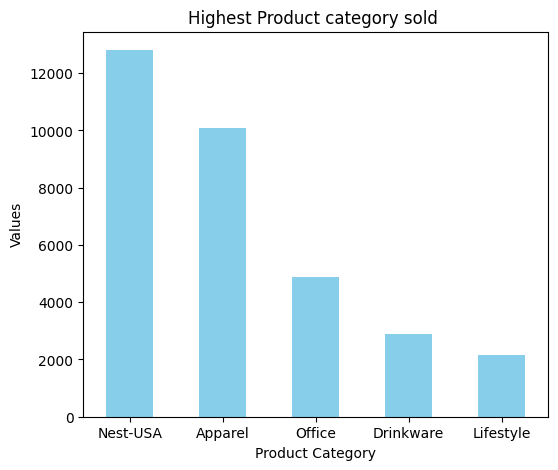

In [ ]:
top_categories = data['Product_Category'].value_counts().head(5)

plt.figure(figsize=(6,5))
top_categories.plot(kind='bar',color='skyblue')
plt.title('Highest Product category sold ')
plt.ylabel('Values')
plt.xlabel('Product Category')
plt.xticks(rotation= 360)
plt.show()

The top 5 sold categories are Nest-USA, Apparel, Office, Drinkware, Lifestyle.

In [ ]:
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])
data['Year'] = data['Transaction_Date'].dt.year
data['Month'] = data['Transaction_Date'].dt.month
monthly_sales = data.groupby(['Year', 'Month']).size()
total_sales_per_month = monthly_sales.groupby('Month').sum()

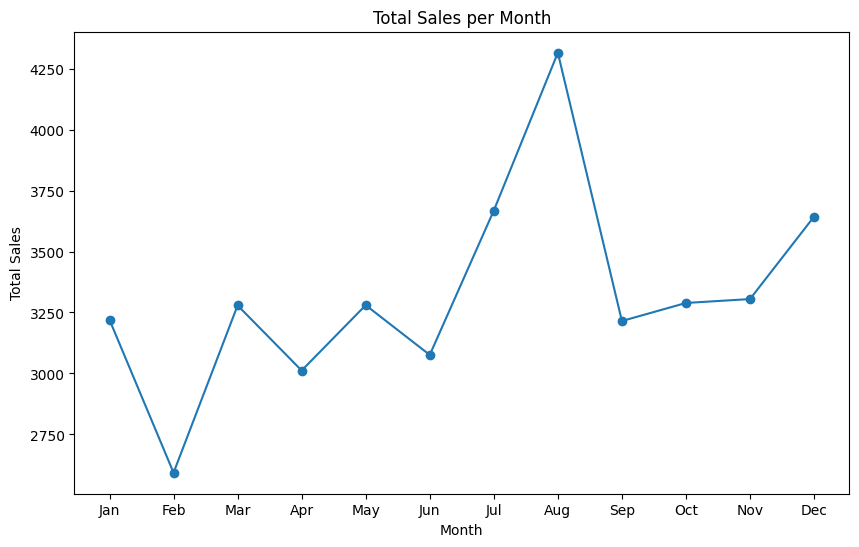

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(total_sales_per_month.index, total_sales_per_month.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales per Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

Maximum total sales has been achieved in the month of August and least amount of total sales in Febraury.

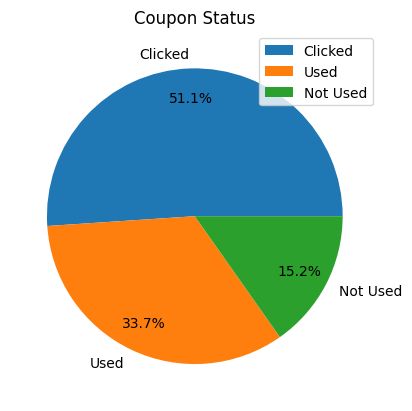

In [ ]:
coupon = data['Coupon_Status'].value_counts()
plt.pie(coupon, labels=coupon.index, autopct='%1.1f%%', pctdistance=0.8)
plt.title('Coupon Status')
plt.legend(loc='upper right')
plt.show()

33.7% of the customers has used the coupon while 15.2% has not used the coupon. The coupon status "clicked" has more of an impact compared to the other categories.

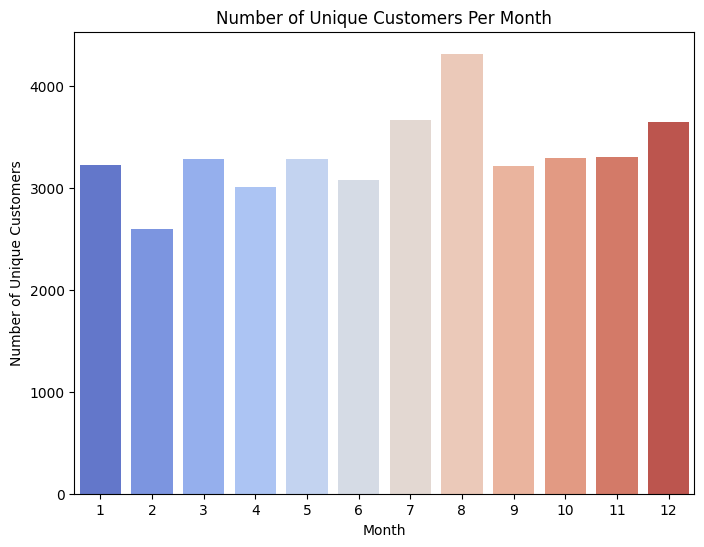

In [ ]:
unique_customers_per_month = data.groupby('Month')['CustomerID'].nunique().reset_index()

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Month', data=data, palette='coolwarm')
plt.xlabel('Month')
plt.ylabel('Number of Unique Customers')
plt.title('Number of Unique Customers Per Month')
plt.show()

August month has the most number number of unique customers.

### CUSTOMER SEGMENTATION

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/file_out.csv', parse_dates = ['Date'])
df

,Unnamed: 0,DocumentID,Date,SKU,Price,Discount,Customer,Quantity
0,0,716,2019-09-23,1039,381.780000,67.372540,1,1.0
1,1,716,2019-09-23,853,593.220000,0.000340,1,1.0
2,2,716,2019-09-23,862,423.730000,-0.001190,1,1.0
3,3,716,2019-09-23,868,201.700000,35.588140,1,1.0
4,4,716,2019-09-23,2313,345.760000,61.019660,1,1.0
...,...,...,...,...,...,...,...,...
33351,33351,13315,2022-11-09,1849,5957.627119,1072.372881,239,4.0
33352,33352,13316,2022-11-09,30,1271.186441,228.813559,477,2.0
33353,33353,13317,2022-11-09,2066,1355.932203,244.067797,370,1.0
33354,33354,13318,2022-11-09,1586,2334.745763,420.254237,356,2.0


In [ ]:
df.shape

(33356, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33356 entries, 0 to 33355
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  33356 non-null  int64         
 1   DocumentID  33356 non-null  int64         
 2   Date        33356 non-null  datetime64[ns]
 3   SKU         33356 non-null  int64         
 4   Price       33356 non-null  float64       
 5   Discount    33356 non-null  float64       
 6   Customer    33356 non-null  int64         
 7   Quantity    33356 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 2.0 MB


In [ ]:
df.drop('Unnamed: 0', axis= 1, inplace= True)

In [ ]:
df.duplicated().sum()

363

In [ ]:
df.drop_duplicates(keep= 'first', inplace= True)

In [ ]:
df.isnull().sum()

DocumentID    0
Date          0
SKU           0
Price         0
Discount      0
Customer      0
Quantity      0
dtype: int64

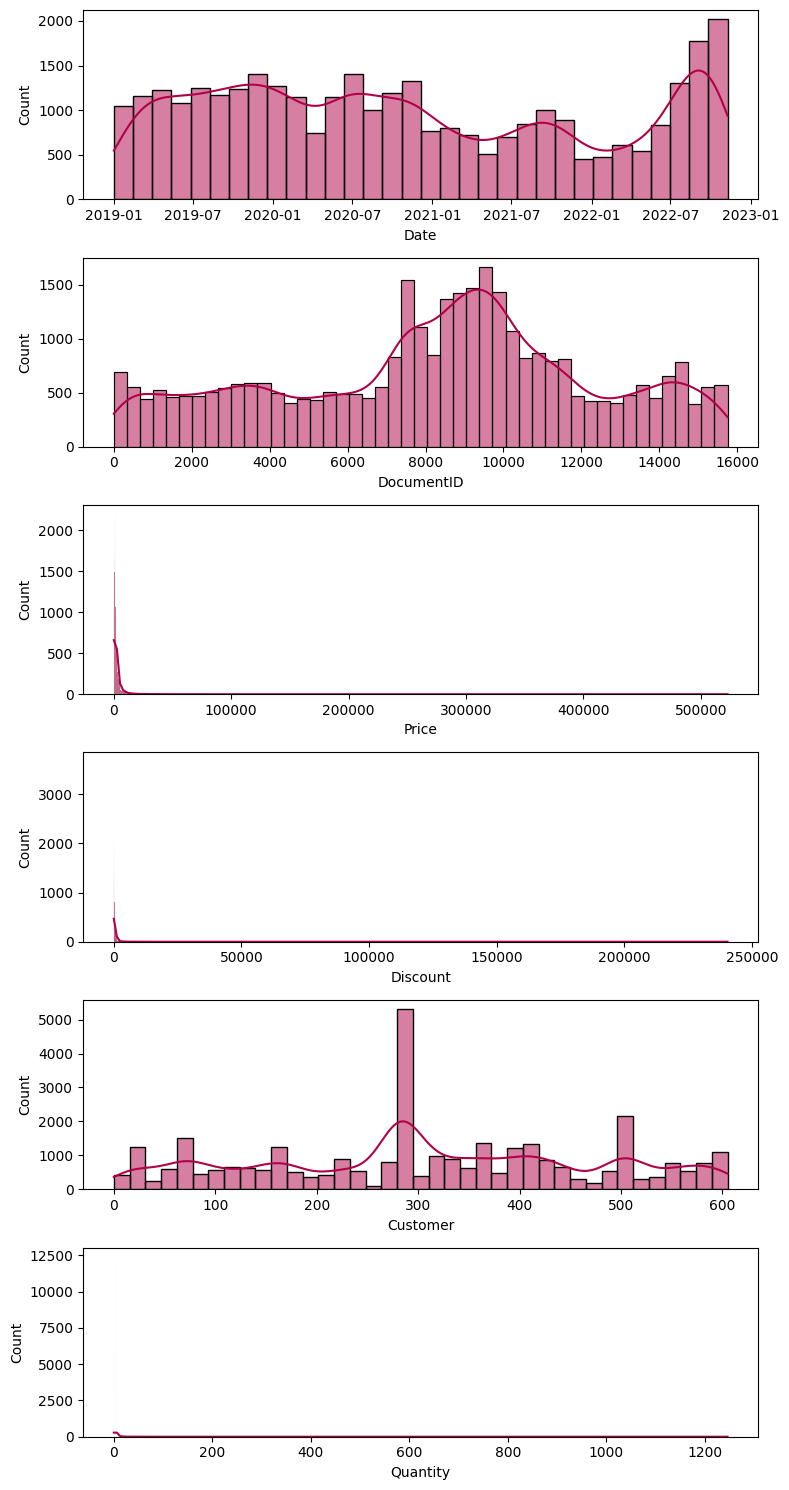

In [ ]:
fig, axis = plt.subplots(6,1, figsize= (8,15))

for i,feature in enumerate(['Date', 'DocumentID', 'Price', 'Discount', 'Customer', 'Quantity']):
    sns.histplot(x= feature, data= df, kde= True, ax= axis[i], color= '#b00149')

plt.tight_layout()
plt.show()

The distribution of data of each category can be observed.

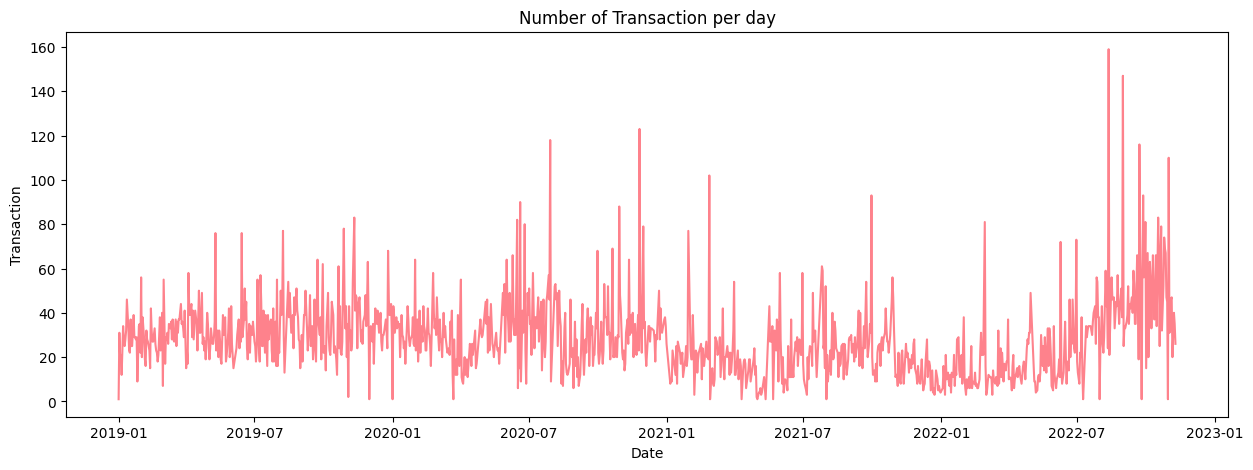

In [ ]:
num_trans_perday = df['Date'].value_counts().to_frame().reset_index().rename(columns= {'index':'Date', 'Date':'Transaction'})

plt.figure(figsize= (15,5))
sns.lineplot(x= 'Date', y= 'Transaction', data= num_trans_perday, color= '#fe828c')
plt.title('Number of Transaction per day')
plt.show()

The above graph visualises the number of transactions made per day.

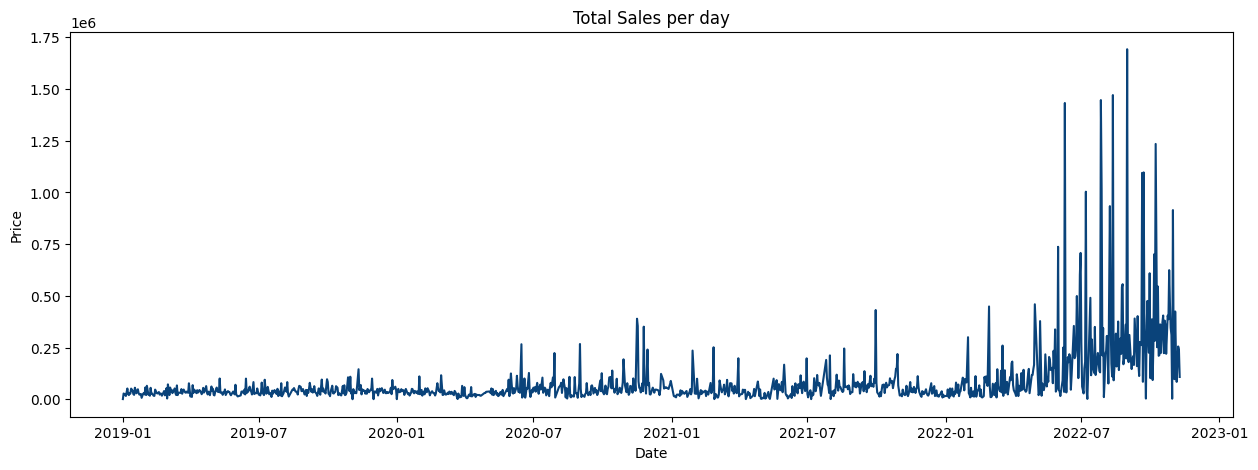

In [ ]:
sales_perday = df.groupby('Date')['Price'].sum().sort_values(ascending= False).to_frame().reset_index()

plt.figure(figsize= (15,5))
sns.lineplot(x= 'Date', y= 'Price', data= sales_perday, color= '#0a437a')
plt.title('Total Sales per day')
plt.show()

The above graph visualises the total sales made per day.

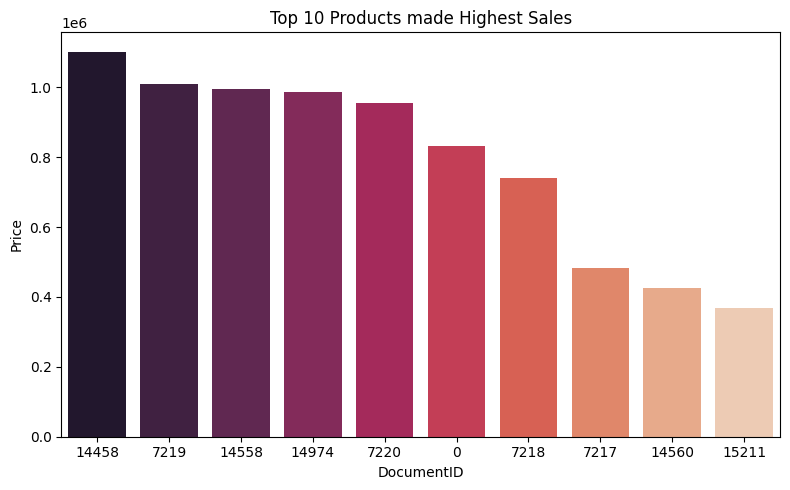

In [ ]:
top10_sales = df.groupby('DocumentID')['Price'].sum().sort_values(ascending= False).head(10).to_frame().reset_index()
top10_sales_index = list(top10_sales['DocumentID'])

plt.figure(figsize= (8,5))
sns.barplot(x= 'DocumentID', y= 'Price', data= top10_sales, order= top10_sales_index,  palette= 'rocket')
plt.title('Top 10 Products made Highest Sales')
plt.tight_layout()
plt.show()

The above graph visualizes top 10 products that made high revenue using barplot.

In [ ]:
# getting the latest invoice date in the dataset
latest_invoice_date = df['Date'].max()
latest_invoice_date

# invoice date before three months of latest date
mon3_ret_date = pd.Timestamp('2023-01-01 00:00:00')
mon3_ret_date

Timestamp('2023-01-01 00:00:00')

In [ ]:
# taking the first part of data that doesn't have last 3 months of transaction

df_part1 = df.copy()
df_part1.set_index('Date', inplace= True)
df_part1 = df_part1.loc[:'2023-01-01']

In [ ]:
# reseting the index
df_part1.reset_index(inplace= True)

# viewing the data of df_part1
df_part1.head()

,Date,DocumentID,SKU,Price,Discount,Customer,Quantity
0,2019-09-23,716,1039,381.78,67.37254,1,1.0
1,2019-09-23,716,853,593.22,0.00034,1,1.0
2,2019-09-23,716,862,423.73,-0.00119,1,1.0
3,2019-09-23,716,868,201.70,35.58814,1,1.0
4,2019-09-23,716,2313,345.76,61.01966,1,1.0


In [ ]:
# calculating the recency of each customer
df_part1_latest_date = df_part1['Date'].max()

recency = df_part1.groupby('Customer').agg({'Date': lambda x :
                                              (df_part1_latest_date - x.max()).days}).reset_index()

recency.rename(columns= {'Date':'Recency'}, inplace= True)
recency

,Customer,Recency
0,0,0
1,1,599
2,2,61
3,3,10
4,4,13
...,...,...
601,601,93
602,602,989
603,603,7
604,604,295


In [ ]:
# calculating the frequency of each customer

frequency = df_part1.groupby('Customer').agg({'Customer':'count'})

frequency.rename(columns= {'Customer':'Frequency'}, inplace= True)
frequency.reset_index(inplace= True)

frequency

,Customer,Frequency
0,0,19
1,1,181
2,2,35
3,3,2
4,4,110
...,...,...
601,601,3
602,602,3
603,603,61
604,604,305


In [ ]:
# calculating the monetary of each customer

monetary = df_part1.groupby('Customer').agg({'Price':'sum'}).reset_index()

monetary.rename(columns= {'Price':'Monetary'}, inplace= True)
monetary

,Customer,Monetary
0,0,101061.254237
1,1,123904.710850
2,2,43406.084743
3,3,5261.605763
4,4,774116.179999
...,...,...
601,601,19930.508474
602,602,2631.355932
603,603,242331.788812
604,604,358709.271177


In [ ]:
RFM = pd.concat([recency.iloc[:,:], frequency.iloc[:,-1], monetary.iloc[:,-1]], axis= 1)
RFM

,Customer,Recency,Frequency,Monetary
0,0,0,19,101061.254237
1,1,599,181,123904.710850
2,2,61,35,43406.084743
3,3,10,2,5261.605763
4,4,13,110,774116.179999
...,...,...,...,...
601,601,93,3,19930.508474
602,602,989,3,2631.355932
603,603,7,61,242331.788812
604,604,295,305,358709.271177


In [ ]:
# getting R_Score for each customer
RFM['R_Score'] = pd.cut(RFM['Recency'], bins= [-1, 30, 120, 400, RFM['Recency'].max()],
                        labels= [4,3,2,1]).astype('int64')

# getting R_Score for each customer
RFM['F_Score'] = pd.cut(RFM['Frequency'], bins= [0, 5, 25, 100, RFM['Frequency'].max()],
                        labels= [1,2,4,8]).astype('int64')

# getting R_Score for each customer
RFM['M_Score'] = pd.cut(RFM['Monetary'], bins= [0, 10000, 100000, 800000, RFM['Monetary'].max()],
                        labels= [1,3,6,10]).astype('int64')

In [ ]:
# concatenating the scores for each customer to get their values
RFM['RFM_Value'] = RFM.apply(lambda x: str(int(x['R_Score'])) + str(int(x['F_Score'])) + str(int(x['M_Score'])), axis=1)

In [ ]:
# adding the the scores for each customer to get their overall score
RFM['RFM_Score'] = RFM['R_Score'] + RFM['F_Score'] + RFM['M_Score']
RFM

,Customer,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Value,RFM_Score
0,0,0,19,101061.254237,4,2,6,426,12
1,1,599,181,123904.710850,1,8,6,186,15
2,2,61,35,43406.084743,3,4,3,343,10
3,3,10,2,5261.605763,4,1,1,411,6
4,4,13,110,774116.179999,4,8,6,486,18
...,...,...,...,...,...,...,...,...,...
601,601,93,3,19930.508474,3,1,3,313,7
602,602,989,3,2631.355932,1,1,1,111,3
603,603,7,61,242331.788812,4,4,6,446,14
604,604,295,305,358709.271177,2,8,6,286,16


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
X_rfm = RFM[['R_Score', 'F_Score', 'M_Score', 'RFM_Value', 'RFM_Score']]
std_scaler = StandardScaler()
X_rfm = std_scaler.fit_transform(X_rfm)

In [ ]:
# building k-means clustering model and by elbow curve method finding the optimal cluster value
list_wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, random_state= 42)
    kmeans.fit(X_rfm)
    list_wcss.append(kmeans.inertia_)

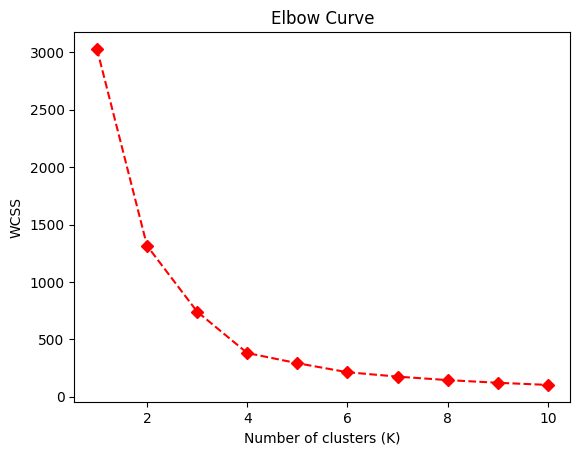

In [ ]:
plt.plot(range(1,11), list_wcss, 'rD--')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Curve')
plt.show()

In [ ]:
# segmenting each customer into different segments based on their RFM scores
RFM['Seg_Num'] = pd.cut(RFM['RFM_Score'], bins= [0, 6, 10, 18, 22],
                               labels= [4,3,2,1])
RFM['Segment_Label'] = pd.cut(RFM['RFM_Score'], bins= [0, 6, 10, 18, 22],
                              labels= ['Basic Customer', 'Standard Customer',
                                       'Prime Customer', 'Elite Customer'])
RFM.head()

,Customer,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Value,RFM_Score,Seg_Num,Segment_Label
0,0,0,19,101061.254237,4,2,6,426,12,2,Prime Customer
1,1,599,181,123904.710850,1,8,6,186,15,2,Prime Customer
2,2,61,35,43406.084743,3,4,3,343,10,3,Standard Customer
3,3,10,2,5261.605763,4,1,1,411,6,4,Basic Customer
4,4,13,110,774116.179999,4,8,6,486,18,2,Prime Customer


In [ ]:
# understanding the different segment of customers with median value
RFM.groupby('Segment_Label')['Recency', 'Frequency', 'Monetary'].median().round().reset_index()

,Segment_Label,Recency,Frequency,Monetary
0,Basic Customer,726.0,1.0,2272.0
1,Standard Customer,61.0,11.0,34331.0
2,Prime Customer,9.0,121.0,206621.0
3,Elite Customer,4.0,406.0,1202909.0


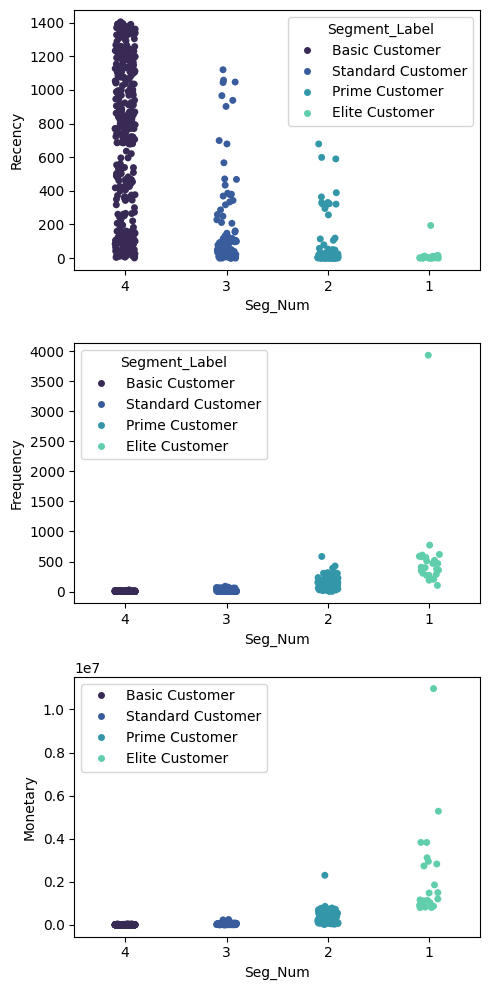

In [ ]:
fig, axis = plt.subplots(3,1, figsize= (5,10))

for i,feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    sns.stripplot(x= 'Seg_Num', y= feature, data= RFM, hue= 'Segment_Label', palette= 'mako', ax= axis[i])

plt.legend()
plt.tight_layout()
plt.show()

### PREDICTION OF CUSTOMER LIFETIME VALUE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [ ]:
df.isnull().sum()

State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [ ]:
numeric_features = [x for x in df.columns if df[x].dtype != 'object']
categorical_features = [x for x in df.columns if df[x].dtype == 'object']

<Axes: xlabel='Customer Lifetime Value', ylabel='Count'>

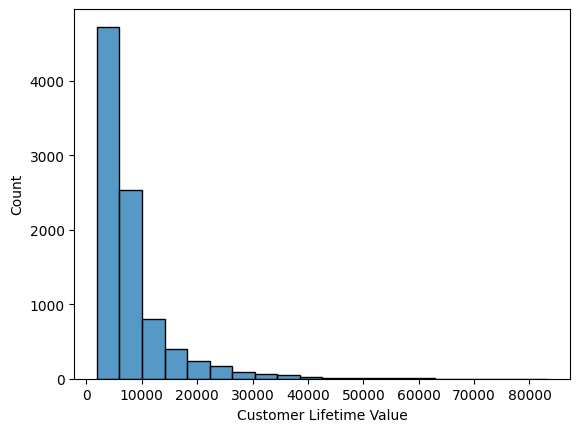

In [ ]:
# Customer Lifetime Value - target
sns.histplot(df['Customer Lifetime Value'], bins = 20)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
df_encoded = df[categorical_features]
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for feature in categorical_features:
    df_encoded[feature] = labelencoder.fit_transform(df_encoded[feature])

In [ ]:
fin_df = pd.concat([df_encoded, df[numeric_features]], axis = 1)
fin_df

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,...,Vehicle Class,Vehicle Size,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,4,0,0,0,1,0,1,1,0,2,...,5,1,2763.519279,56274,69,32,5,0,1,384.811147
1,0,0,1,0,4,0,1,2,1,5,...,0,1,6979.535903,0,94,13,42,0,8,1131.464935
2,2,0,2,0,1,0,1,1,1,5,...,5,1,12887.431650,48767,108,18,38,0,2,566.472247
3,1,0,0,0,4,1,1,1,0,1,...,3,1,7645.861827,0,106,18,65,0,7,529.881344
4,4,0,0,0,1,1,0,2,1,3,...,0,1,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,0,0,1,1,2,1,1,3,...,0,1,23405.987980,71941,73,18,89,0,2,198.234764
9130,1,1,1,1,1,0,1,0,0,2,...,0,1,3096.511217,21604,79,14,28,0,1,379.200000
9131,1,0,1,0,4,1,1,2,0,1,...,0,1,8163.890428,0,85,9,37,3,2,790.784983
9132,1,0,1,1,1,1,1,1,1,4,...,0,0,7524.442436,21941,96,34,3,0,3,691.200000


<Axes: >

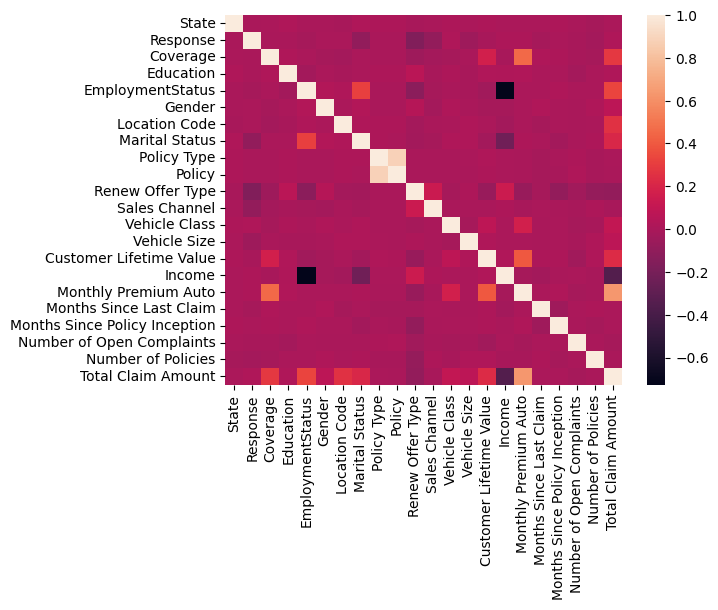

In [ ]:
sns.heatmap(fin_df.corr())

In [ ]:
cor_matrix = fin_df.corr().abs()
upper_triangle = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.60)]
fin_df = fin_df.drop(to_drop, axis = 1)

In [ ]:
y = fin_df['Customer Lifetime Value']
X = fin_df.drop('Customer Lifetime Value', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRFRegressor

names = ['GradientBoost', 'XGB', 'LightGMB']
regressors = [GradientBoostingRegressor(verbose=False), XGBRFRegressor(), LGBMRegressor()]

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
scores = pd.DataFrame()
for name, reg in zip(names, regressors):

    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    new_row = {'Test':name, 'RMSE':round(np.sqrt(mean_squared_error(y_test, y_pred)),2),
               'MAE':round(mean_absolute_error(y_test, y_pred),2),
               'MAPE': round(mean_absolute_percentage_error(y_test, y_pred),4),
               'R2_score': round(r2_score(y_test, y_pred),4)
               }
    scores = scores.append(new_row, ignore_index=True)

scores = scores.set_index('Test')
scores.style.format('{:.2f}')

display(scores.sort_values(by = 'R2_score', ascending = False))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001816 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 375
[LightGBM] [Info] Number of data points in the train set: 7307, number of used features: 18
[LightGBM] [Info] Start training from score 8022.789386


,RMSE,MAE,MAPE,R2_score
Test,,,,
LightGMB,3993.27,1572.88,0.1235,0.6906
XGB,4070.47,1670.59,0.1229,0.6785
GradientBoost,4120.47,1743.22,0.1394,0.6706


LightGMB is comparitively the better model to predict customer lifetime value.